# Probability and Statistics

# Statistics

- Numpy
- Scipy
- Matplotlib
- Pandas
- Statsmodels
- Seaborn

Scikit-learn requires:
- Python 3
- NumPy
- SciPy

The easiest way to install scikit-learn is to use pip or or conda:
- pip install -U scipy
- conda install scipy

- Normal Distribution
- Linear Regression
- xxx

## Discrete Random Variables

See: http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook9_discrete_random_variables/py_exploratory_comp_9_sol.ipynb

## The randint and seed Functions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

print(rnd.randint(0, 1 + 1, 10)) # (low, high, size)

print(rnd.randint(0, 1 + 1, 10))

rnd.seed(10)
print(rnd.randint(0, 1 + 1, 10))

rnd.seed(10)
print(rnd.randint(0, 1 + 1, 10))

[1 1 0 0 0 1 0 1 1 0]
[1 0 0 1 1 0 1 1 1 0]
[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 0 1 1]


## Flipping a Coin

In [10]:
# Flipping a coin

import numpy as np
import numpy.random as rnd

flip = rnd.randint(0, 1 + 1, 100)
headcount = 0
tailcount = 0
for i in range(100):
    if flip[i] == 0:
        headcount += 1
    else:
        tailcount += 1
print('number of heads:', headcount)
print('number of tails:', tailcount)

headcount = np.count_nonzero(flip == 0)
tailcount = np.count_nonzero(flip == 1)
print('headcount', headcount)
print('tailcount', tailcount)

outcomes = np.zeros(2, dtype='int') # Two outcomes. heads are stored in outcome[0], tails in outcome[1]
for i in range (2):
    outcomes[i] = np.count_nonzero(flip == i)
    print('outcome ', i, ' is ', outcomes[i])

number of heads: 59
number of tails: 41
headcount 59
tailcount 41
outcome  0  is  59
outcome  1  is  41


## Throwing a Die

In [11]:
# Throwing a dice

import numpy as np
import numpy.random as rnd

rnd.seed(33)
dicethrow = rnd.randint(1, 6 + 1, 100)
side = np.zeros(6, dtype='int')
for i in range(6):
    side[i] = np.count_nonzero(dicethrow == i + 1)
    print('number of times', i + 1, 'is', side[i])
print('total number of throws ', sum(side))

number of times 1 is 17
number of times 2 is 17
number of times 3 is 15
number of times 4 is 24
number of times 5 is 19
number of times 6 is 8
total number of throws  100


## Flipping a Coin Twice

In [12]:
import numpy as np
import numpy.random as rnd

rnd.seed(55)
flips = rnd.randint(low=0, high=1 + 1, size=(2, 100))
tails = np.sum(flips, axis=0)
number_of_tails = np.zeros(3, dtype='int')
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)
print('number of 0, 1, 2 tails:', number_of_tails)

rnd.seed(55)
flips1 = rnd.randint(low=0, high=1 + 1, size=5)
rnd.seed(55)
flips2 = rnd.choice(range(2), size=5, replace=True)
np.alltrue(flips1 == flips2)  # Check whether all values in the two arrays are equal

number of 0, 1, 2 tails: [27 47 26]


True

## Matplotlib Bar Graph

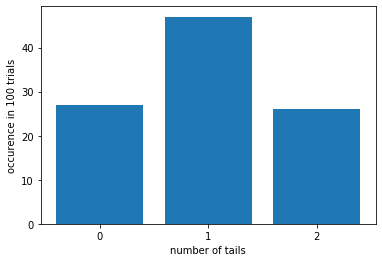

In [13]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

number_of_tails = np.zeros(3, dtype='int')
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)

plt.bar(range(0, 3), number_of_tails)
plt.xticks(range(0, 3))
plt.xlabel('number of tails')
plt.ylabel('occurence in 100 trials');

## Cumulative Probability

cum_prob  [0.27 0.74 1.  ]


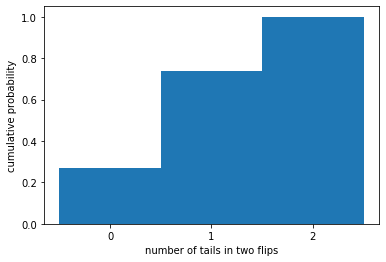

In [14]:
import numpy as np
import matplotlib.pyplot as plt

prob = number_of_tails / 100  # number_of_tails was computed two code cells back
cum_prob = np.cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
print('cum_prob ', cum_prob)

plt.bar(range(0, 3), cum_prob, width=1)
plt.xticks(range(0, 3))
plt.xlabel('number of tails in two flips')
plt.ylabel('cumulative probability');

## Flip a Coin Five Times

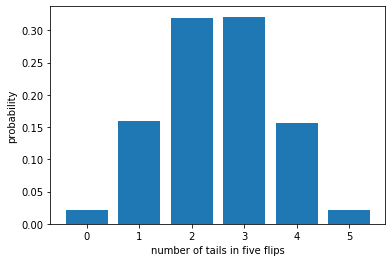

In [15]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
tails = np.sum(rnd.randint(0, 1 + 1, (5, 1000)), axis=0)
counttails = np.zeros(6, dtype='int')
for i in range(6):
    counttails[i] = np.count_nonzero(tails == i)
plt.bar(range(0, 6), counttails / N)
plt.xlabel('number of tails in five flips')
plt.ylabel('probability');

## Flip a Coin 5 Times Revisited

In [16]:
from scipy.special import comb
print('Theoretical probabilities:')
for k in range(6):
    print(k, ' tails ', comb(5, k) * 0.5 ** k * 0.5 ** (5 - k))
for N in (1000, 10000, 100000):
    tails = np.sum(rnd.randint(0, 1 + 1, (5, N)), axis=0)
    counttails = np.zeros(6)
    for i in range(6):
        counttails[i] = np.count_nonzero(tails==i)
    print('Probability with', N, 'trials: ', counttails / float(N))

Theoretical probabilities:
0  tails  0.03125
1  tails  0.15625
2  tails  0.3125
3  tails  0.3125
4  tails  0.15625
5  tails  0.03125
Probability with 1000 trials:  [0.028 0.152 0.336 0.291 0.164 0.029]
Probability with 10000 trials:  [0.0308 0.1584 0.3114 0.3106 0.1607 0.0281]
Probability with 100000 trials:  [0.03136 0.15718 0.31118 0.31196 0.15627 0.03205]


## Maximum Value of Two Dice Throws

In [17]:
import numpy as np
import matplotlib.pyplot as plt

for N in [100, 1000, 10000]:
    dice = rnd.randint(1, 6 + 1, (2, N))
    highest_dice = np.max(dice, axis=0)
    outcome = np.zeros(6)
    for i in range(6):
        outcome[i] = np.sum(highest_dice == i + 1) / N
    print('Outcome for', N, 'throws: ', outcome)
# Exact values
exact = np.zeros(6)
for i, j in enumerate(range(1, 12, 2)):
    exact[i] = j / 36
print('Exact probabilities: ',exact)

Outcome for 100 throws:  [0.06 0.06 0.19 0.2  0.21 0.28]
Outcome for 1000 throws:  [0.037 0.078 0.122 0.209 0.239 0.315]
Outcome for 10000 throws:  [0.0264 0.0848 0.1409 0.1865 0.2507 0.3107]
Exact probabilities:  [0.02777778 0.08333333 0.13888889 0.19444444 0.25       0.30555556]


## Election Poll

In [18]:
import numpy as np
import matplotlib.pyplot as plt

rnd.seed(2)
people = np.zeros(1000000, dtype='int')  # candidate A is 0
people[490000:] = 1  # candidate B is 1
poll = rnd.choice(people, 1000)
polled_for_A = np.count_nonzero(poll == 0)
print('Polled for A:', polled_for_A)
if polled_for_A > 500: 
    print('The Dog will predict the wrong winner')
else:
    print('The Dog will predict the correct winner')
    
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    poll = rnd.choice(people, 1000)
    polled_for_A = np.count_nonzero(poll == 0)
    if polled_for_A > 500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 polls of 1000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 1000)

Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    poll = rnd.choice(people, 5000)
    polld_for_A = np.count_nonzero(poll == 0)
    if polled_for_A > 2500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 polls of 5000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 5000)

Polled for A: 508
The Dog will predict the wrong winner
1000 polls of 1000 people
Probability that The Dog predicts candidate A to win: 0.267
1000 polls of 5000 people
Probability that The Dog predicts candidate A to win: 0.0


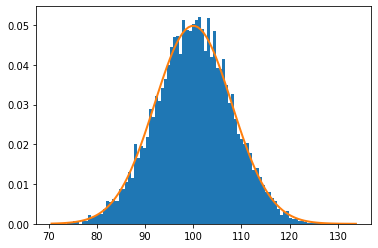

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100., 8.
samples = np.random.normal(loc=mu, scale=sigma, size=10000)
counts, bins, patches = plt.hist(samples, bins=100, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( -(bins - mu)**2 / (2 * sigma**2) ), lw=2)
plt.show()

## Linear Regression

Given two set of observations x and y, we want to test the hypothesis that y is a linear function of x:

$$y = slope*x + intercept + noise$$

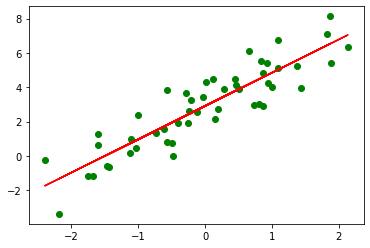

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
x = np.random.randn(n)
y = 2*x + 3 + np.random.randn(n)     # y = slope*x + intercept + noise
fit = np.polyfit(x, y, deg=1)

fig, ax = plt.subplots()
ax.scatter(x, y, color='green')
ax.plot(x, fit[0] * x + fit[1], color='red')

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# sample data
x = np.arange(10)
y = 5*x + 10 + 4 * np.random.normal(size=x.shape)

## Linear Regression

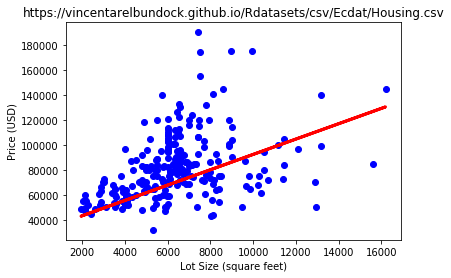

In [7]:
# linear regression

import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

df = pd.read_csv("data/Housing.csv")

Y = df['price']
X = df['lotsize']

X = X.values.reshape(len(X),1)
Y = Y.values.reshape(len(Y),1)

# Split data into training and testing sets
X_train = X[:-250]
X_test = X[-250:]

# Split targets into training and testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]

# Plot scatter
plt.scatter(X_test, Y_test,  color='blue')
plt.title('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Housing.csv')
plt.xlabel('Lot Size (square feet)')
plt.ylabel('Price (USD)')

# Create linear regression object
regr = linear_model.LinearRegression()

# Train model using training sets
regr.fit(X_train, Y_train)

# Plot regression
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

# Binomial Distribution

See: [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

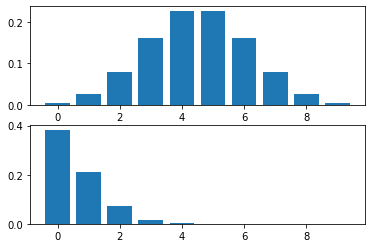

In [8]:
import matplotlib.pyplot as plt

def factorial(n):
    if n == 1: return 1
    return n*factorial(n-1)

def ncr(n, r):
    return factorial(n)/(factorial(r)*factorial(n-r))

def binomialprob(n, r, p):
    return ncr(n,r)*p**r*(1-p)**(n-r)
    
x = range(10)

plt.figure(1)

y = [binomialprob(len(x)+1, i+1, 0.5) for i in x]
plt.subplot(211)
plt.bar(x, y)

y = [binomialprob(len(x)+1, i+1, 0.1) for i in x] # poisson is limiting case where n is large p is small but n*p is finite
plt.subplot(212)
plt.bar(x, y)

plt.show()